In [ ]:
import os
import torch # Import the torch library
from torch import nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import MNIST
from torchvision.utils import save_image

In [ ]:
#define model parameters
number_epochs = 10
batch_size = 128
learning_rate = 1e-4

In [ ]:
transform_image = transforms.Compose([
 transforms.ToTensor(),
 transforms.Normalize((0.5,), (0.5,)) # Changed to 1 channel normalization
])
dataset = MNIST('./data', transform=transform_image)
data_loader = DataLoader(dataset, batch_size=batch_size,
shuffle=True)

In [ ]:
class autoencoder_model(nn.Module):
    def __init__(self):
        super(autoencoder_model, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(True),
            nn.Linear(128, 64),
            nn.ReLU(True), nn.Linear(64, 12), nn.ReLU(True),
            nn.Linear(12, 3))
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.ReLU(True),
            nn.Linear(12, 64),
            nn.ReLU(True),
            nn.Linear(64, 128),
            nn.ReLU(True), nn.Linear(128, 28 * 28), nn.Tanh())

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

model = autoencoder_model()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(
    model.parameters(), lr=learning_rate, weight_decay=1e-5)

In [ ]:
def to_image(x):
 x = 0.5 * (x + 1)
 x = x.clamp(0, 1)
 x = x.view(x.size(0), 1, 28, 28)
 return x

In [ ]:
import os

# Create the directory for saving images if it doesn't exist
if not os.path.exists('./mlp_img'):
    os.makedirs('./mlp_img')

for epoch in range(number_epochs):
    for data in data_loader:
        image, _ = data  # We don't need the label, so use `_`

        # Flatten the 28x28 image to 784
        image = image.view(image.size(0), -1)

        # Optional: move to GPU if available
        # image = image.to(device)  # device = torch.device('cuda' or 'cpu')

        # Forward pass
        output = model(image)
        loss = criterion(output, image)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Print epoch loss (loss.item() instead of deprecated loss.data[0])
    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch + 1, number_epochs, loss.item()))

    # Save reconstructed image every 10 epochs
    if epoch % 10 == 0:
        pic = to_image(output.cpu().detach())
        save_image(pic, './mlp_img/image_{}.png'.format(epoch))

# Save the final model weights
torch.save(model.state_dict(), './sim_autoencoder.pth')

Epoch [1/10], Loss: 0.2395
Epoch [2/10], Loss: 0.2277
Epoch [3/10], Loss: 0.2013
Epoch [4/10], Loss: 0.1969
Epoch [5/10], Loss: 0.1895
Epoch [6/10], Loss: 0.1922
Epoch [7/10], Loss: 0.1864
Epoch [8/10], Loss: 0.1842
Epoch [9/10], Loss: 0.1710
Epoch [10/10], Loss: 0.1652


In [ ]:
#AE with ConvNet
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
from torchvision.utils import save_image
from torch.autograd import Variable
import os

# Hyperparameters
number_epochs = 10
batch_size = 128
learning_rate = 1e-4

# Make directory to save images
if not os.path.exists('./dc_img'):
    os.mkdir('./dc_img')

# Transformations
transform_image = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # MNIST is grayscale: single channel
])

# Dataset and Loader
dataset = MNIST('./data', download=True, transform=transform_image)
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Autoencoder
class ConvAutoencoder(nn.Module):
    def __init__(self):
        super(ConvAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, 3, stride=3, padding=1),
            nn.ReLU(True),
            nn.MaxPool2d(2, stride=2),
            nn.Conv2d(16, 8, 3, stride=2, padding=1),
            nn.ReLU(True),
            nn.MaxPool2d(2, stride=1)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(8, 16, 3, stride=2),
            nn.ReLU(True),
            nn.ConvTranspose2d(16, 8, 5, stride=3, padding=1),
            nn.ReLU(True),
            nn.ConvTranspose2d(8, 1, 2, stride=2, padding=1),
            nn.Tanh()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

model = ConvAutoencoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)

# Training loop
for epoch in range(number_epochs):
    for data in data_loader:
        img, _ = data  # labels not needed
        img = Variable(img)
        output = model(img)
        loss = criterion(output, img)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch + 1, number_epochs, loss.item()))

    # Save reconstruction every epoch
    if epoch % 1 == 0:
        save_image(output.cpu().data, './dc_img/image_{}.png'.format(epoch))

# Save model
torch.save(model.state_dict(), './convolutional_autoencoder.pth')


100%|██████████| 9.91M/9.91M [00:00<00:00, 80.4MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 24.9MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 33.0MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.54MB/s]


Epoch [1/10], Loss: 0.4163
Epoch [2/10], Loss: 0.3120
Epoch [3/10], Loss: 0.3001
Epoch [4/10], Loss: 0.2528
Epoch [5/10], Loss: 0.2358
Epoch [6/10], Loss: 0.2242
Epoch [7/10], Loss: 0.2267
Epoch [8/10], Loss: 0.2128
Epoch [9/10], Loss: 0.2053
Epoch [10/10], Loss: 0.2083


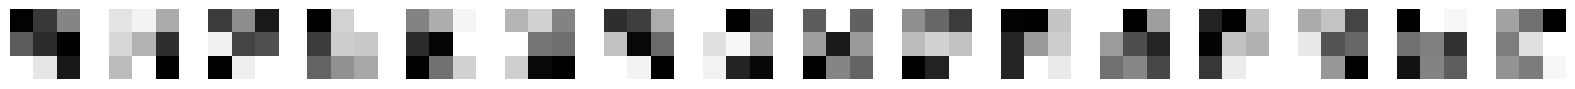

In [ ]:
#visualize learned forms
import matplotlib.pyplot as plt

def visualize_kernels(layer, num_filters=16):
    weights = layer.weight.data.cpu().numpy()
    fig, axes = plt.subplots(1, num_filters, figsize=(num_filters, 1))

    for i in range(num_filters):
        kernel = weights[i, 0]  # first channel
        axes[i].imshow(kernel, cmap='gray')
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

visualize_kernels(model.encoder[0])


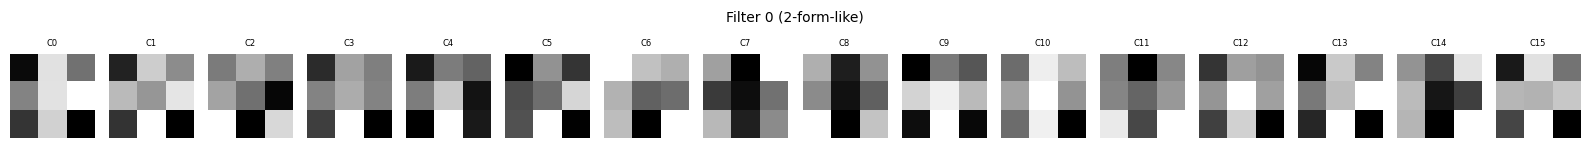

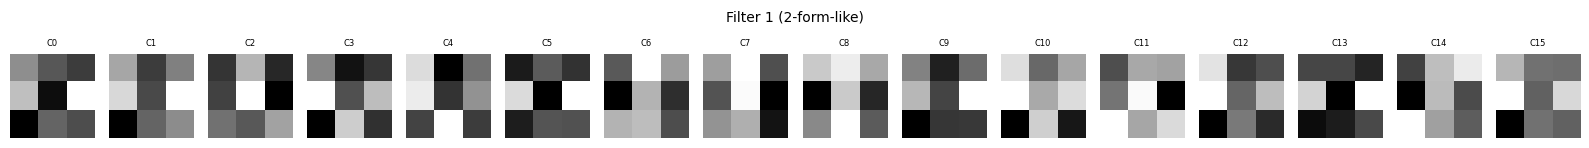

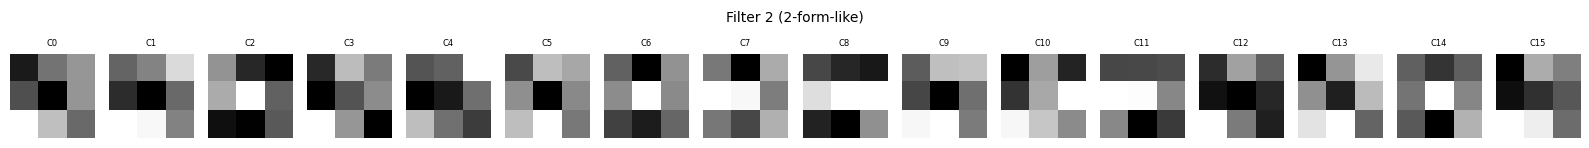

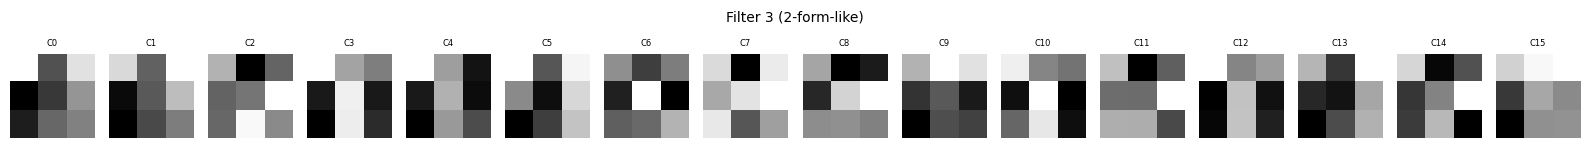

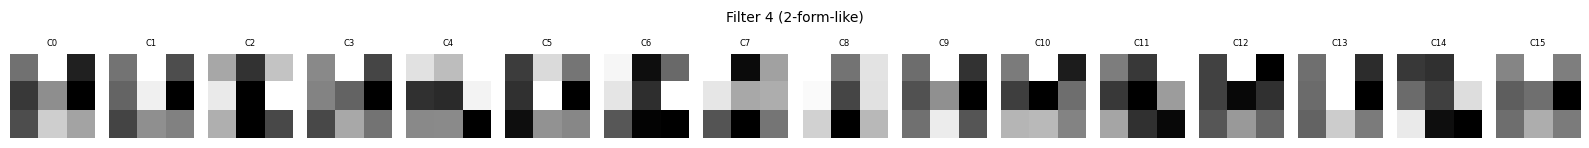

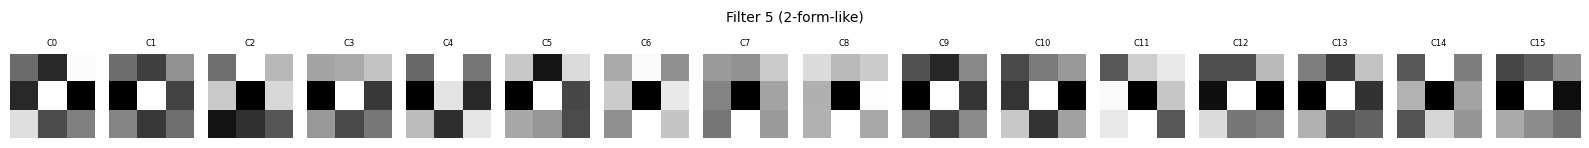

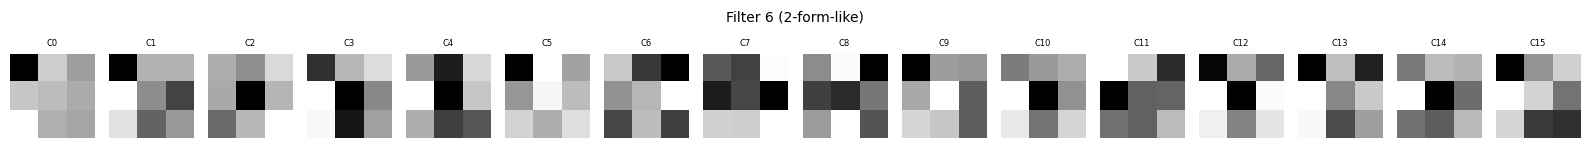

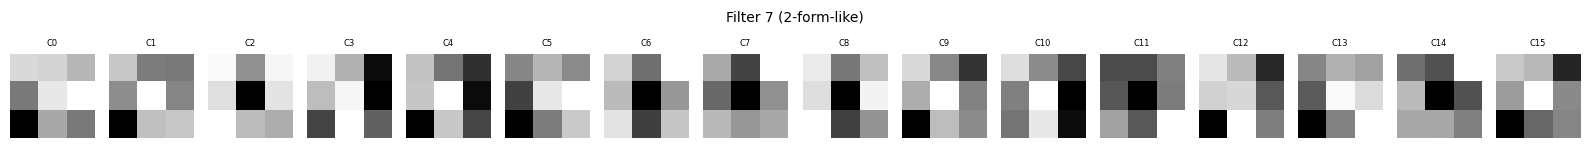

In [ ]:
#visualize 2 form analogues
import matplotlib.pyplot as plt

def visualize_second_layer_filters(layer, num_filters=8):
    weights = layer.weight.data.cpu().numpy()  # shape: [8, 16, 3, 3]
    num_input_channels = weights.shape[1]

    for i in range(num_filters):
        fig, axes = plt.subplots(1, num_input_channels, figsize=(num_input_channels, 1.5))
        for j in range(num_input_channels):
            kernel = weights[i, j]  # shape: (3, 3)
            axes[j].imshow(kernel, cmap='gray')
            axes[j].axis('off')
            axes[j].set_title(f'C{j}', fontsize=6)
        plt.suptitle(f"Filter {i} (2-form-like)", fontsize=10)
        plt.tight_layout()
        plt.show()

visualize_second_layer_filters(model.encoder[3])  # if 2nd Conv layer is index 3


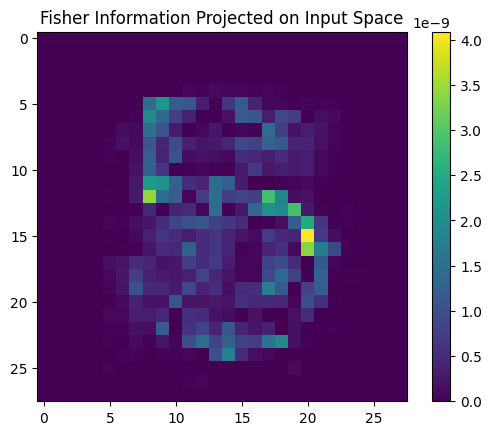

In [ ]:
#Fisher-based saliency map: where changes in the input affect the loss most — effectively, how "curved" the Fisher metric looks when pulled back to image space.
from torch.autograd import grad

def fisher_on_input(model, input_image, criterion):
    model.eval()
    model.zero_grad()
    input_image.requires_grad = True

    output = model(input_image)
    loss = criterion(output, input_image)
    grad_input = grad(loss, input_image, create_graph=True)[0]

    fisher_input = torch.sum(grad_input**2, dim=1).detach().cpu()
    return fisher_input

# Assuming 'img' is available from the dataloader loop and has shape [batch_size, 1, 28, 28]
# If img is a single image (e.g., from dataset[0]), you might need img.unsqueeze(0) to add a batch dimension
# If img is from a batch, just use img
img_fisher = fisher_on_input(model, img, criterion) # Removed [None]

# Assuming img_fisher is [batch_size, 28, 28] after sum(dim=1)
plt.imshow(img_fisher[0], cmap='viridis') # Assuming you want to plot the first image's fisher
plt.title("Fisher Information Projected on Input Space")
plt.colorbar()
plt.show()